# <center>Data 1030 - Final Project</center>

### Data 1030 Environment

In [1]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.9":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.9":
    print(FAIL, "Python version 3.9 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.21.1", 'matplotlib': "3.4.2",'sklearn': "0.24.2", 
                'pandas': "1.3.1",'xgboost': "1.3.3", 'shap': "0.39.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.9.7 | packaged by conda-forge | (default, Sep  2 2021, 17:58:46) 
[Clang 11.1.0 ]

[ OK ] numpy version 1.21.1 is installed.
[ OK ] matplotlib version 3.4.2 is installed.
[ OK ] sklearn version 0.24.2 is installed.
[ OK ] pandas version 1.3.1 is installed.
[ OK ] xgboost version 1.3.3 is installed.
[ OK ] shap version 0.39.0 is installed.


### Exploratory Data Analysis
Read the white wine quality dataset into a pandas data frame.

In [2]:
import pandas as pd

# load data from a csv file
df = pd.read_csv('../data/winequality-white.csv', sep=';')

print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

The number of rows and columns:

In [3]:
print('The number of rows:', df.shape[0])
print('The number of columns:', df.shape[1])

The number of rows: 4898
The number of columns: 12


The data types of the columns. Based on the data description, the quality column is categorical and all features are continuous.

In [4]:
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


The target variable is `quality`, which is a categorical column.

In [5]:
print(df['quality'].value_counts()) #quality is a 7-category variable.

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64


In [6]:
print(df['total sulfur dioxide'].describe())

count    4898.000000
mean      138.360657
std        42.498065
min         9.000000
25%       108.000000
50%       134.000000
75%       167.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64


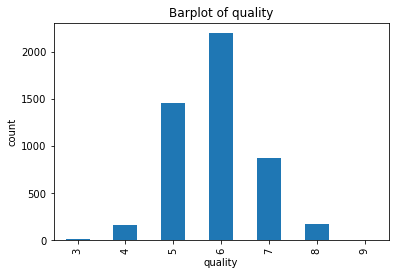

In [7]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

#create a bar plot of the quality column
pd.value_counts(df['quality']).sort_index().plot.bar()
plt.ylabel('count')
plt.xlabel('quality')
plt.title('Barplot of quality')
plt.savefig('../figures/barplot_quality.jpg', dpi=300)
plt.show()

Histograms of features

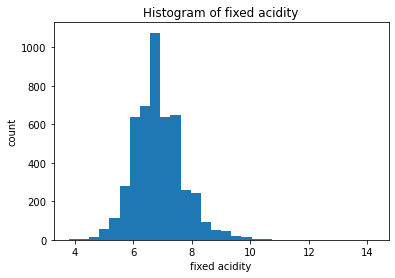

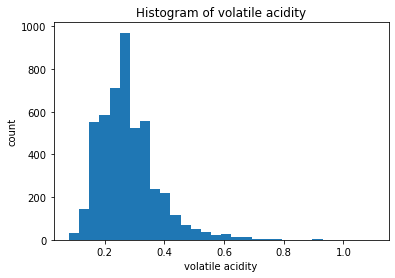

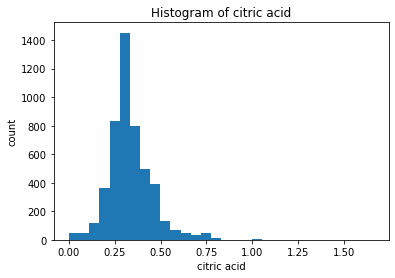

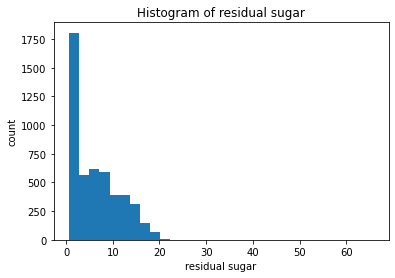

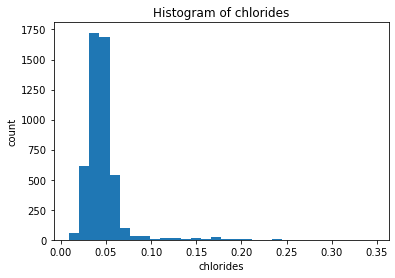

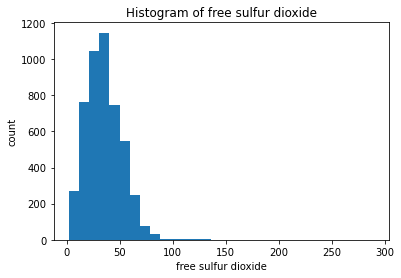

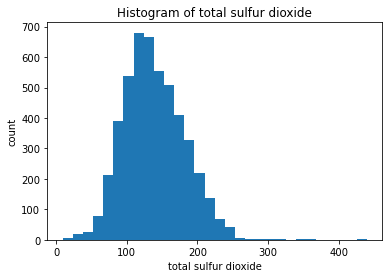

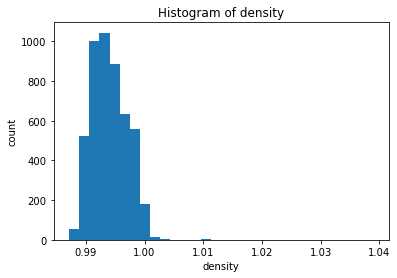

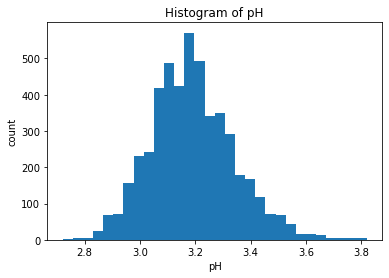

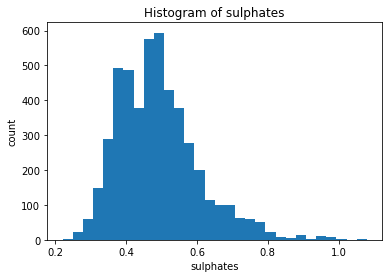

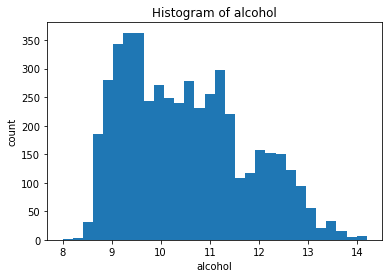

In [8]:
feature_name = df.columns[df.columns!='quality']

for name in feature_name:
    df[name].plot.hist(bins=30) 
    plt.xlabel(name)
    plt.ylabel('count')
    plt.title('Histogram of ' + name)
    plt.savefig('../figures/histogram_'+name+'.jpg', dpi=300)
    plt.show()

Feature vs. Qualtiy columns

- Boxplots

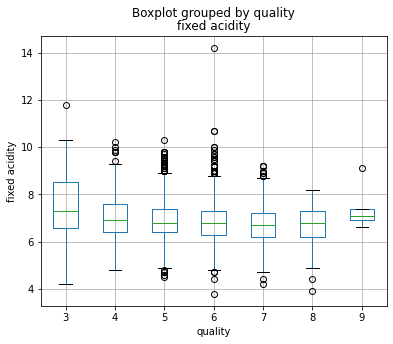

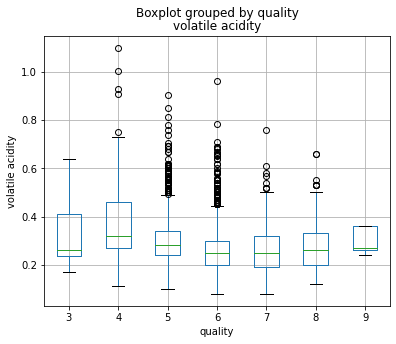

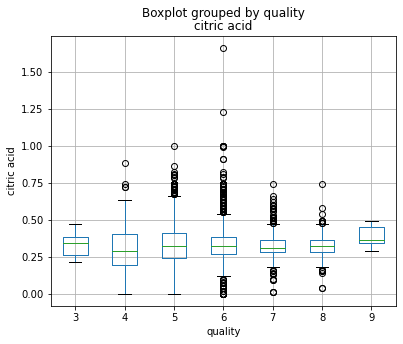

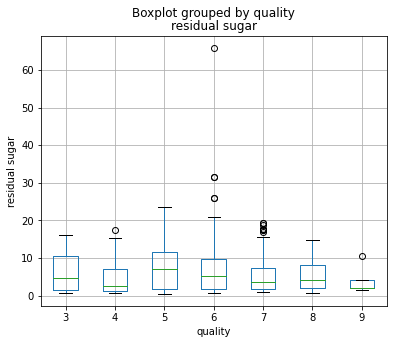

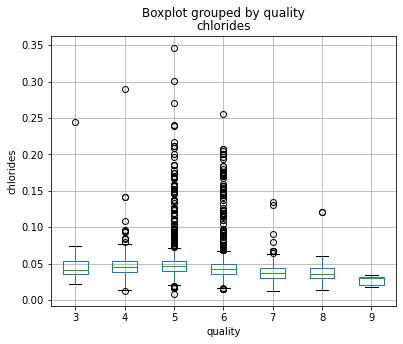

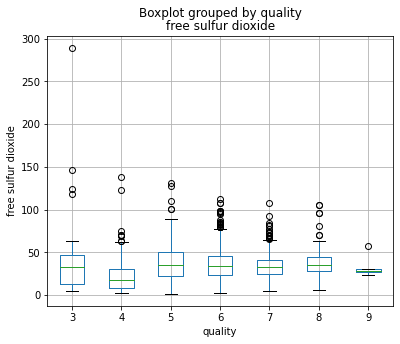

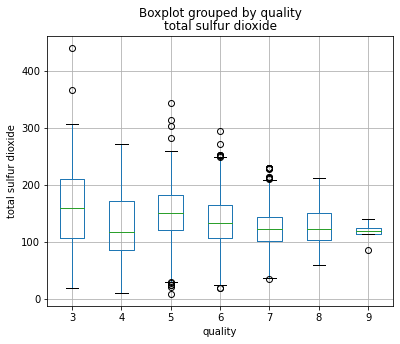

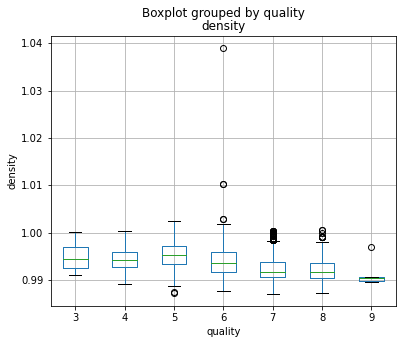

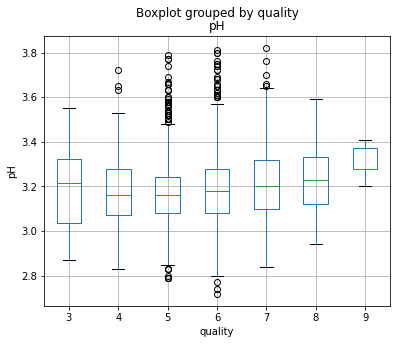

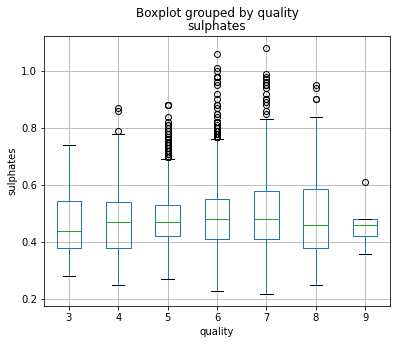

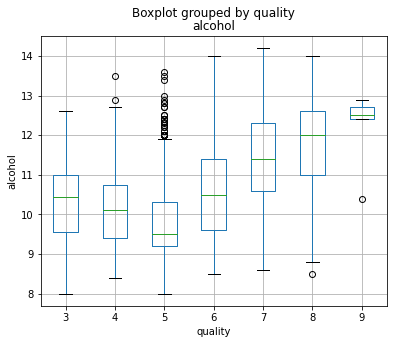

In [9]:
for name in feature_name:
    fig, ax = plt.subplots(figsize=(6,5))
    df[['quality', name]].boxplot(by='quality', ax=ax)
    plt.ylabel(name)
    plt.xlabel('quality')
    plt.savefig('../figures/boxplot_'+name+'.jpg', dpi=300)
    plt.show()

- Violin Plot

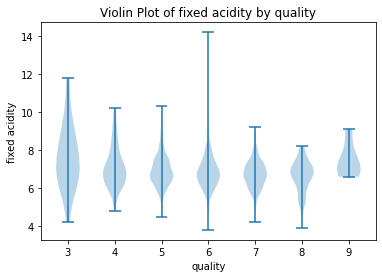

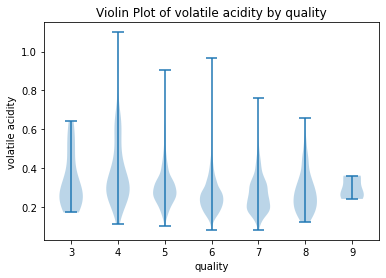

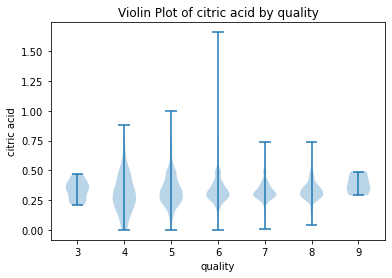

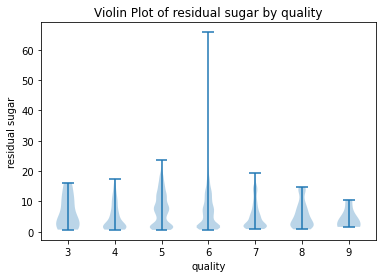

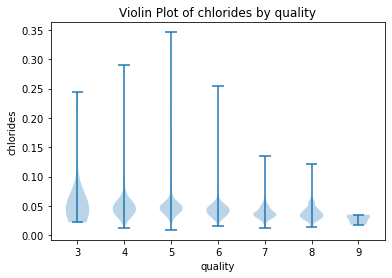

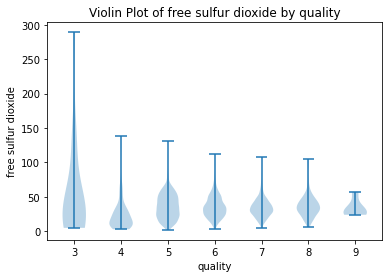

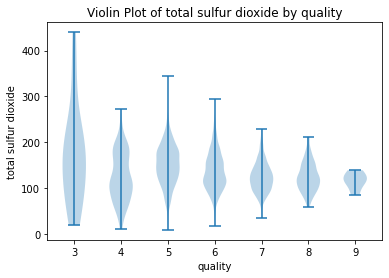

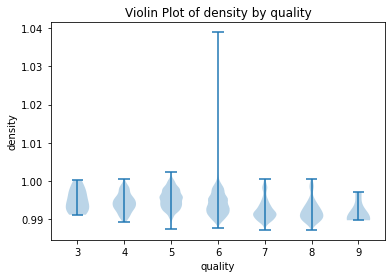

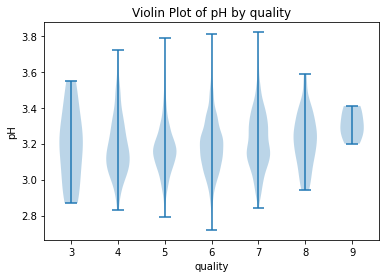

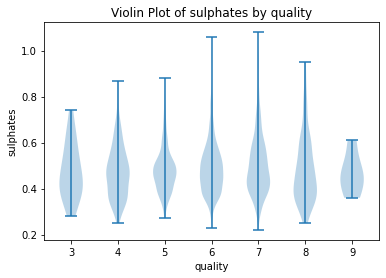

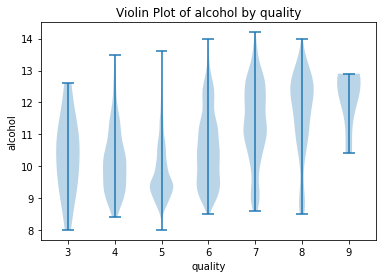

In [10]:
for name in feature_name:
    dataset = []
    for i in range(3,10):
        dataset.append(df[df['quality']==i][name].values)
        
    plt.violinplot(dataset=dataset)
    plt.xticks([1,2,3,4,5,6,7],['3','4','5','6','7','8','9'])
    plt.ylabel(name)
    plt.xlabel('quality')
    plt.title('Violin Plot of '+name+' by quality')
    plt.savefig('../figures/violinplot_'+name+'.jpg', dpi=300)
    plt.show()

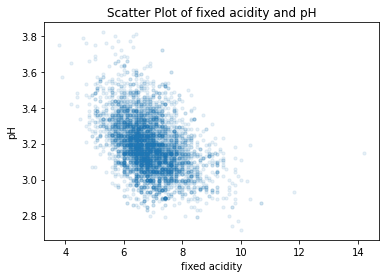

In [11]:
import numpy as np
#scatter plot of fixed acidity and pH
df.plot.scatter('fixed acidity','pH',alpha=0.1,s=10)
plt.title('Scatter Plot of fixed acidity and pH')
plt.savefig('../figures/scatter_fixed_acidity_pH', dpi=300)
plt.show()

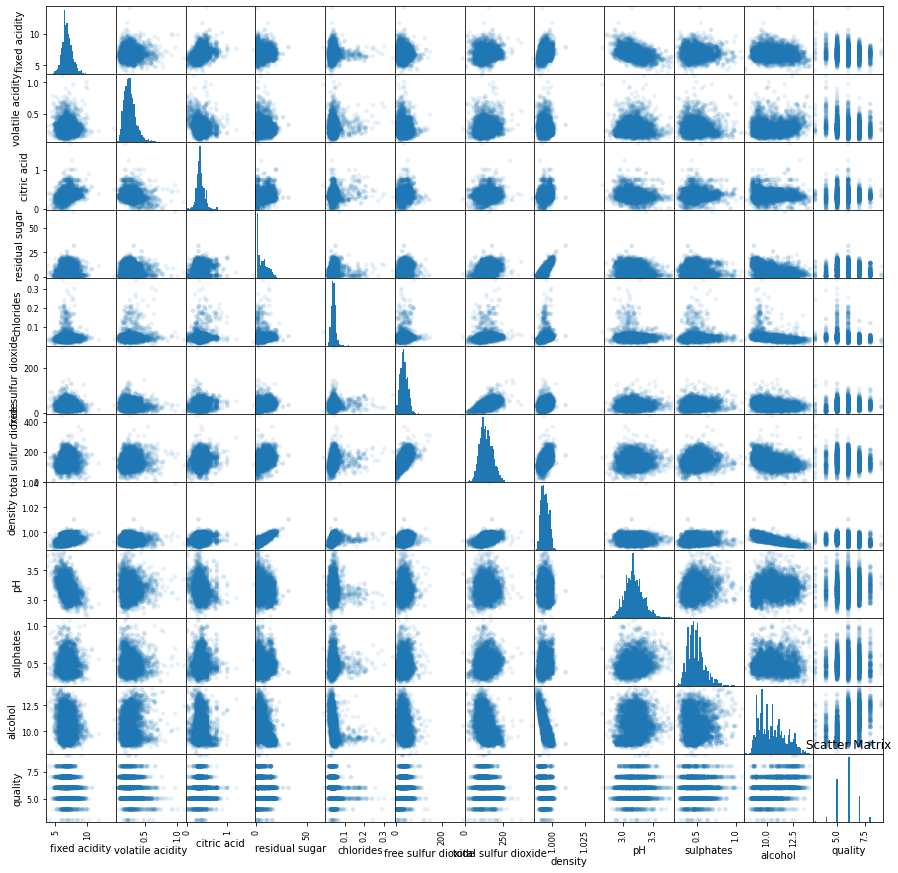

In [12]:
pd.plotting.scatter_matrix(df, figsize=(15, 15), marker='o', hist_kwds={'bins': 50},
                           s=20, alpha=.1)
plt.title('Scatter Matrix')
plt.savefig('../figures/scatter_matrix_1.jpg', dpi=300)
plt.show()

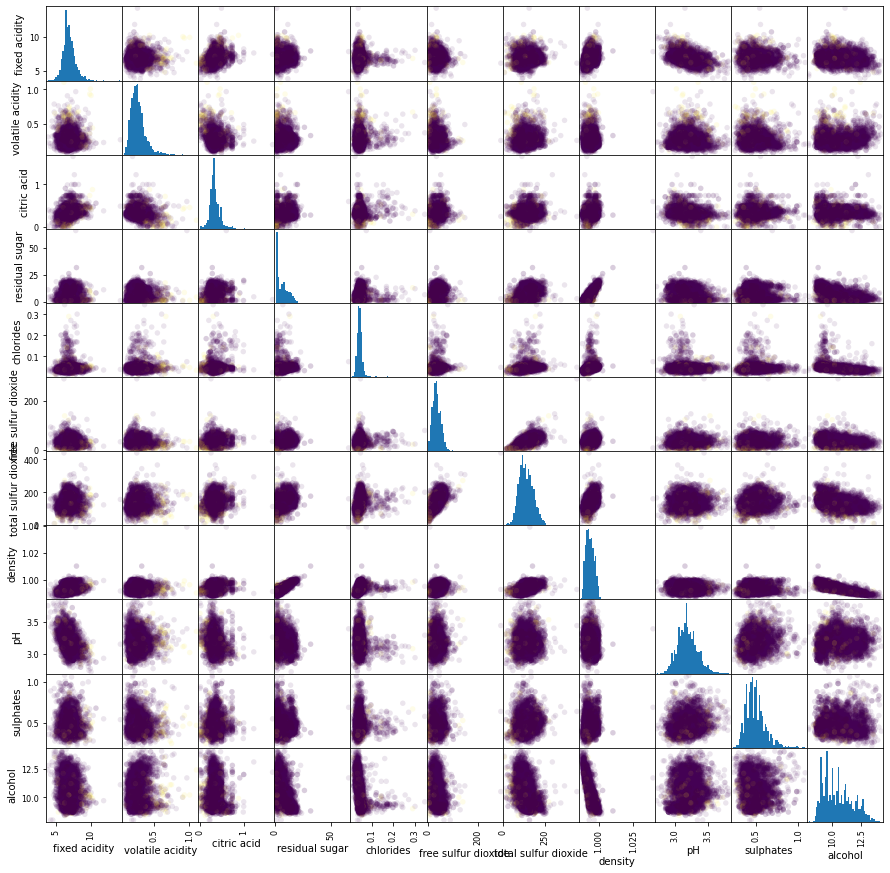

In [13]:
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(15, 15),c = pd.get_dummies(df['quality']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.savefig('../figures/scatter_matrix_2.jpg', dpi=300)
plt.show()

### Data Preprocessing
Split the dataset, and use the standard scaler to the continuous features.

In [15]:
# separate the feature matrix X, and target variable y
y = df['quality'] #We want to do the classification for predicting the quality of white wine
X = df.loc[:, df.columns != 'quality'] # all other columns are features
print(y)
print(X.head())

0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4        

In [16]:
pd.options.mode.chained_assignment = None
y[(y >=3) & (y <= 4)] = 0
y[(y >=5) & (y <= 6)] = 1
y[(y >= 7)] = 2

In this dataset, the categories are equally classified. To make our further predictions more efficient, we divide the categories into three classes.

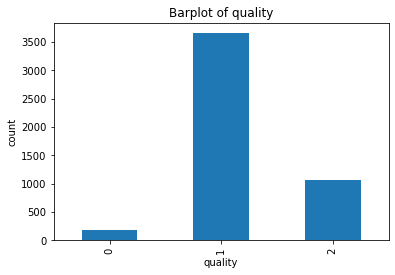

In [17]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

#create a bar plot of the quality column
pd.value_counts(df['quality']).sort_index().plot.bar()
plt.ylabel('count')
plt.xlabel('quality')
plt.title('Barplot of quality')
plt.savefig('../figures/barplot_quality_new.jpg', dpi=300)
plt.show()

In [19]:
# stratified K Fold: The features in the dataset are generally IID, and the quality column is imbalanced. 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

random_state = 42

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=random_state)
print('test balance:',y_test.value_counts(normalize=True)) #20% of points are in the test set

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    
    #use StandardScaler to the data
    scaler = StandardScaler()
    X_train_prep = scaler.fit_transform(X_train)
    X_val_prep = scaler.transform(X_val)
    X_test_prep = scaler.transform(X_test)
    
    print('train balance:')
    print(y_train.value_counts(normalize=True))
    print('training set:', X_train_prep.shape)
    print(X_train_prep)
    print('val balance:')
    print(y_val.value_counts(normalize=True))
    print('validation set:', X_val_prep.shape)
    print(X_val_prep)
    print('test set:', X_test_prep.shape) 
    print(X_test_prep)
    
#Check Reproducibility: We run the code several times, each time the output is the same.

test balance: 1    0.745918
2    0.216327
0    0.037755
Name: quality, dtype: float64
train balance:
1    0.746172
2    0.216309
0    0.037519
Name: quality, dtype: float64
training set: (2612, 11)
[[ 1.97927818 -0.86258508  1.94690873 ... -0.78928815  1.58277765
  -1.00867989]
 [ 1.3786119   0.61664998  1.34606006 ... -0.39679786 -0.94451511
   1.45191323]
 [-0.66365345  0.2221873   4.95115206 ...  1.30399337  0.01411318
   0.9597946 ]
 ...
 [ 1.13834539 -0.76396941 -1.14317012 ... -1.05094834 -0.2473309
   0.9597946 ]
 [ 0.17727934  0.61664998  0.48770483 ... -0.52762796  0.36270528
  -0.84464035]
 [-0.06298717  2.8848104  -0.37065041 ...  0.84608804  2.19281384
  -0.27050196]]
val balance:
1    0.746554
2    0.216692
0    0.036753
Name: quality, dtype: float64
validation set: (1306, 11)
[[-0.66365345  0.12357163  0.57354035 ... -0.26596777 -0.42162696
  -1.00867989]
 [ 1.49874516  0.32080297  0.23019826 ... -1.18177843 -1.29310722
   2.02605162]
 [-1.02405322 -0.07365971 -0.28481489